
# Span Selector

The `.SpanSelector` is a mouse widget that enables selecting a range on an
axis.

Here, an x-range can be selected on the upper axis; a detailed view of the
selected range is then plotted on the lower axis.

<div class="alert alert-info"><h4>Note</h4><p>If the SpanSelector object is garbage collected you will lose the
    interactivity.  You must keep a hard reference to it to prevent this.</p></div>


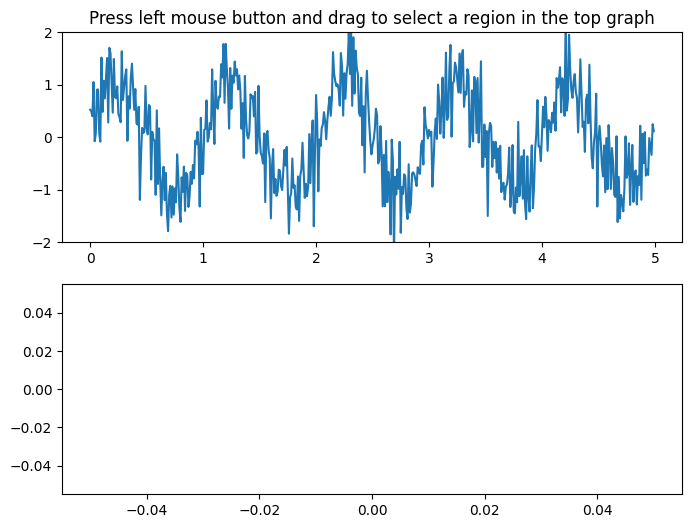

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import SpanSelector

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

x = np.arange(0.0, 5.0, 0.01)
y = np.sin(2 * np.pi * x) + 0.5 * np.random.randn(len(x))

ax1.plot(x, y)
ax1.set_ylim(-2, 2)
ax1.set_title('Press left mouse button and drag '
              'to select a region in the top graph')

line2, = ax2.plot([], [])


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    region_x = x[indmin:indmax]
    region_y = y[indmin:indmax]

    if len(region_x) >= 2:
        line2.set_data(region_x, region_y)
        ax2.set_xlim(region_x[0], region_x[-1])
        ax2.set_ylim(region_y.min(), region_y.max())
        fig.canvas.draw_idle()


span = SpanSelector(
    ax1,
    onselect,
    "horizontal",
    useblit=True,
    props=dict(alpha=0.5, facecolor="tab:blue"),
    interactive=True,
    drag_from_anywhere=True
)
# Set useblit=True on most backends for enhanced performance.


plt.show()

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.widgets.SpanSelector`

